In [ ]:
%pip install -q git+https://github.com/yfukai/BaSiCPy@autosegment

# Install and import 

In [2]:
workdir = "/work/fukai/basicpy"

In [3]:
import numpy as np
import pandas as pd
from basicpy import BaSiC, datasets, metrics
from itertools import product
from tqdm import tqdm
from matplotlib import pyplot as plt
import pickle 
from os import path
from skimage import filters

plt.rcParams["font.family"] = ""

In [4]:
with open(path.join(workdir,"wo_darkfield_imagess.pickle"),"rb") as f:
    imagess=pickle.load(f)

In [5]:
parameters_df=pd.read_csv(path.join(workdir,"wo_darkfield_parameters.csv"))

# Calculate deviation

In [9]:
flatfields = np.load("flatfields.npy")
estimated_parameters_df = pd.read_csv("wo_flatfield_estimated_parameters_df.csv",index_col=0)

In [16]:
assert len(estimated_parameters_df) == len(flatfields)
set(estimated_parameters_df.keys())

{'ave_count',
 'blob_dist_key',
 'deviation',
 'fitting_mode',
 'intensity',
 'n_images',
 'rep',
 'smoothness_flatfield',
 'true_flatfield_id'}

In [23]:
grp

,true_flatfield_id,intensity,ave_count,n_images,blob_dist_key,rep,fitting_mode,smoothness_flatfield,deviation
16786,3,1000,100,1000,unbiased,4,ladmap,0.001000,0.001217
16787,3,1000,100,1000,unbiased,4,ladmap,0.004642,0.001133
16788,3,1000,100,1000,unbiased,4,ladmap,0.021544,0.000888
16789,3,1000,100,1000,unbiased,4,ladmap,0.100000,0.000455
16790,3,1000,100,1000,unbiased,4,ladmap,0.464159,0.000436
16791,3,1000,100,1000,unbiased,4,ladmap,2.154435,0.001332
16792,3,1000,100,1000,unbiased,4,ladmap,10.000000,0.010959


In [34]:
keys

['true_flatfield_id', 'fitting_mode']

/tmp/ipykernel_131486/640315496.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


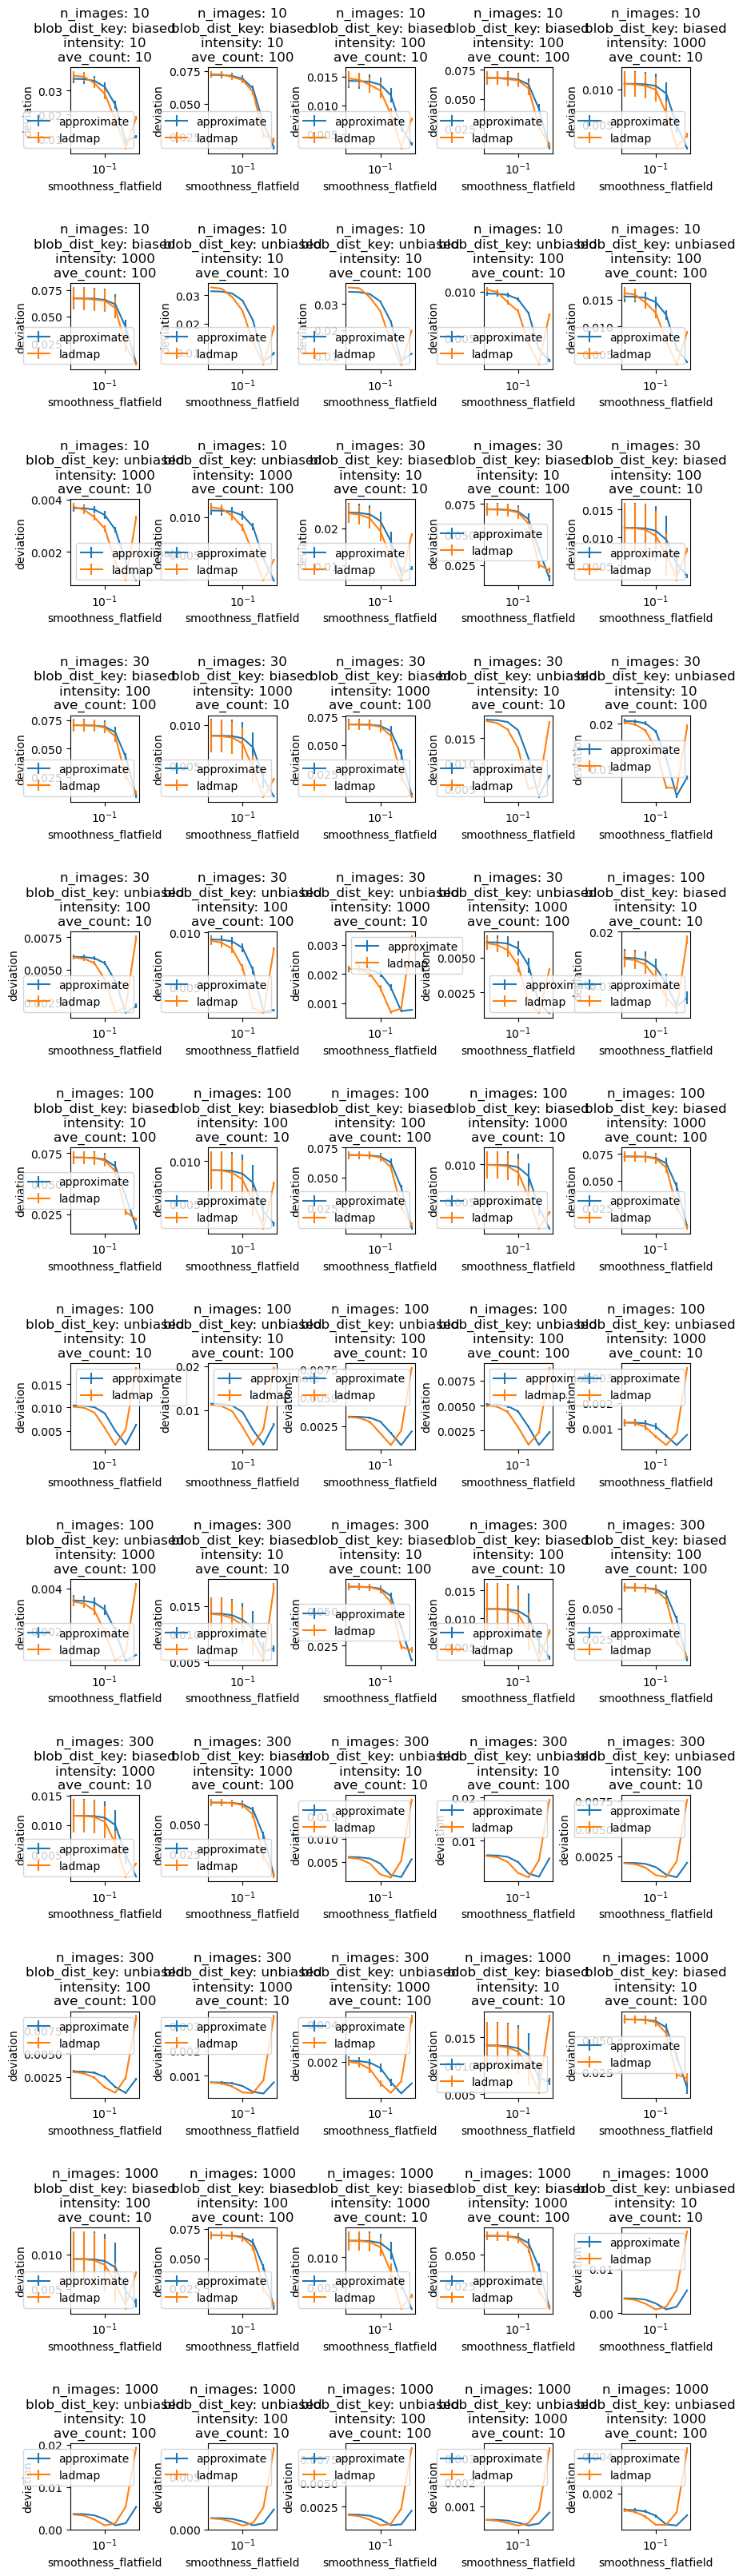

In [37]:
df = estimated_parameters_df[estimated_parameters_df["true_flatfield_id"] == 0]
image_properties = ['n_images','blob_dist_key', 'intensity', 'ave_count']
keys = list(set(estimated_parameters_df.keys()) - {
    'smoothness_flatfield',
    "deviation",
    "true_flatfield_id",
    "rep", *image_properties
})
assert len(keys) == 1

num_imagess = df["n_images"].unique().tolist()
ncols = len(num_imagess)
grps = list(df.groupby(image_properties))
nrows = (len(grps) - 1) // ncols + 1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 40), gridspec_kw={"hspace":1.5, "wspace":1.})
for ii, (image_property, grp0) in enumerate(df.groupby(image_properties)):
    ax = axes[ii // ncols, ii % ncols]
    for key,grp in grp0.groupby(keys[0]):
        vals = grp.groupby("smoothness_flatfield")["deviation"].agg(["mean","std"]).reset_index()
        ax.errorbar(vals["smoothness_flatfield"],vals["mean"],vals["std"],label=key)
    ax.set_title("\n".join([f"{k}: {v}" for k,v in zip(image_properties, image_property)]))
    ax.legend()
    ax.set_xlabel("smoothness_flatfield")
    ax.set_ylabel("deviation")
    ax.set_xscale("log")
fig.tight_layout()